<a href="https://colab.research.google.com/github/MoAbeds/computer-Vision/blob/colabs/Birds_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          11962        364  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            927         68  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6931        199  0.9705882        

In [2]:
!kaggle datasets download gpiosenka/100-bird-species -p /content/data/ --unzip

 99% 1.49G/1.49G [00:46<00:00, 34.2MB/s]
100% 1.49G/1.49G [00:46<00:00, 34.4MB/s]


In [3]:
!pip install pytorch-lightning torchmetrics --quiet


     |████████████████████████████████| 585 kB 32.8 MB/s 
     |████████████████████████████████| 419 kB 57.9 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 140 kB 35.1 MB/s 
     |████████████████████████████████| 1.1 MB 55.9 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 71.2 MB/s 
     |████████████████████████████████| 144 kB 59.2 MB/s 


In [4]:
!git clone https://github.com/MoAbeds/Pytorch-Lightning-Temp-.git

Cloning into 'Pytorch-Lightning-Temp-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [5]:
cd /content/Pytorch-Lightning-Temp-

/content/Pytorch-Lightning-Temp-


In [6]:
from data import FolderData
from model import LightModel
from utils import callbacks
from utils import Visualize

from pytorch_lightning import Trainer ,LightningModule

data_dir = '/content/data'
cb = callbacks.MyPrintingCallback()
logger = callbacks.TensorBoardLogger('Birds-CLASSIFICATION')
save_check = callbacks.ModelCheckpoint()
Epochs = 5
Precision = 16
dm = FolderData.DataModule(data_dir)
dm.setup()
model = LightModel(val_length=dm.val_length)




trainer = Trainer(gpus=1,
                      benchmark=True,
                      max_epochs=Epochs,
                      precision=Precision,
                      callbacks=[cb, save_check],
                      check_val_every_n_epoch=1,
                      gradient_clip_val=8,
                      logger=logger)
trainer.fit(model, datamodule=dm)
trainer.test(model, dataloaders=dm.test_dataloader())








58388


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: Birds-CLASSIFICATION/lightning_logs


58388


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GoogLeNet        | 6.0 M 
1 | criterion | CrossEntropyLoss | 0     
2 | accuracy  | Accuracy         | 0     
-----------------------------------------------
6.0 M     Trainable params
0         Non-trainable params
6.0 M     Total params
12.020    Total estimated model params size (MB)


===> Sanity check...


Sanity Checking: 0it [00:00, ?it/s]

Epoch 1 Train Loss: nan, Train Acc: nan


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Epoch 1 Val Loss: 6.041, Val Acc: 0.00


Training: 0it [00:00, ?it/s]

In training...


Validation: 0it [00:00, ?it/s]

Epoch 1 Train Loss: 5.628, Train Acc: 0.01
Epoch 1 Val Loss: 5.202, Val Acc: 0.02
Time spent for Epoch 1 -----> -6m 4s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 2 Train Loss: 5.330, Train Acc: 0.02
Epoch 2 Val Loss: 4.512, Val Acc: 0.07
Time spent for Epoch 2 -----> -6m 12s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 3 Train Loss: 5.097, Train Acc: 0.04
Epoch 3 Val Loss: 4.091, Val Acc: 0.12
Time spent for Epoch 3 -----> -6m 15s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 4 Train Loss: 4.899, Train Acc: 0.05
Epoch 4 Val Loss: 3.701, Val Acc: 0.18
Time spent for Epoch 4 -----> -6m 14s

In training...


Validation: 0it [00:00, ?it/s]

Epoch 5 Train Loss: 4.734, Train Acc: 0.07
Epoch 5 Val Loss: 3.463, Val Acc: 0.20
Time spent for Epoch 5 -----> -6m 15s

Training completes in -----> -30m 59s
Best Validation Accuracy is 0.205


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


58388


Testing: 0it [00:00, ?it/s]

IndexError: ignored

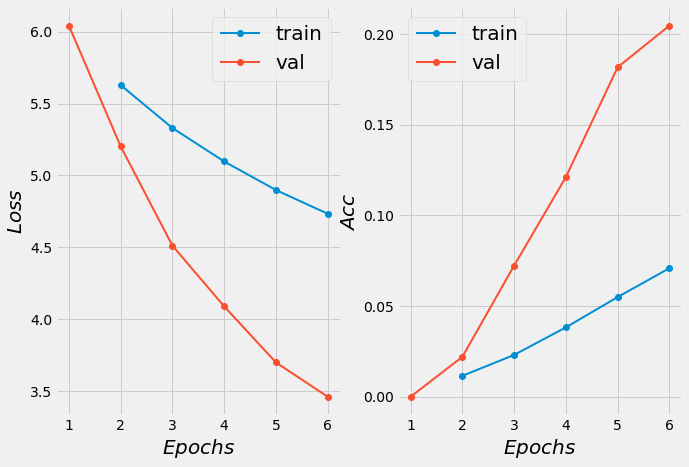

In [7]:
Visualize.visualize_cost(model.train_loss, model.train_acc, model.val_loss, model.val_acc)
